### 0. Importing relevant packages

In [ ]:
#Import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps


import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.utils

In [ ]:
#Setup device-agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 1. Get Data

In [ ]:
# Mounting google drive and import data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Get image path and extract the zip file into directory
import zipfile
from pathlib import Path
import os

#replace the data path with your own path
data_path = Path('replace with your own path')
image_path = Path('/content/datasets')

#Unzip
with zipfile.ZipFile(data_path/"datasets_resized.zip",'r') as zip_ref:
  print("Unzipping the data")
  zip_ref.extractall(image_path)

  print("Unzip complete")




Unzipping the data
Unzip complete


In [ ]:
train_dir = Path('/content/datasets/datasets_resized/train')
test_dir = Path('/content/datasets/datasets_resized/test')

### 2.Understanding the data

In [ ]:
#Walk through pizza, steak, sushi directory and list number of files
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)


There are 1 directories and 0 images in '/content/datasets'.
There are 2 directories and 0 images in '/content/datasets/datasets_resized'.
There are 100 directories and 0 images in '/content/datasets/datasets_resized/test'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n02099601'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n03127925'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n02120079'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n03207743'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n01558993'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n04149813'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n02174001'.
There are 0 directories and 100 images in '/content/datasets/datasets_resized/test/n06794110'.
There are 0 dire

## 2.1 Visualizing some images

In [ ]:

#Path to train and test directories

def count_images_in_directory(base_path):
  directory_names=[]
  image_counts=[]
  total_directories = 0
  for root, dirs,files in os.walk(base_path):
    for dir_name in dirs:
      dir_path = os.path.join(root, dir_name)
      image_count = len([f for f in os.listdir(dir_path) if f.endswith('.JPEG')])
      directory_names.append(dir_name)
      image_counts.append(image_count)
      print(f"Directory: {dir_name}, Image Count: {image_count}")
      total_directories += 1
  print(f"Total number of directories: {total_directories}")
  return directory_names, image_counts, total_directories





In [ ]:
#Count images and directories in train
if train_dir.exists():
  train_directory_names, train_image_counts, train_total_directories = count_images_in_directory(train_dir)

Directory: n02114548, Image Count: 500
Directory: n02174001, Image Count: 500
Directory: n01981276, Image Count: 500
Directory: n03075370, Image Count: 500
Directory: n02091831, Image Count: 500
Directory: n13054560, Image Count: 500
Directory: n03838899, Image Count: 500
Directory: n04067472, Image Count: 500
Directory: n03998194, Image Count: 500
Directory: n02971356, Image Count: 500
Directory: n03527444, Image Count: 500
Directory: n02101006, Image Count: 500
Directory: n04596742, Image Count: 500
Directory: n03908618, Image Count: 500
Directory: n04251144, Image Count: 500
Directory: n04443257, Image Count: 500
Directory: n02138441, Image Count: 500
Directory: n03347037, Image Count: 500
Directory: n01558993, Image Count: 500
Directory: n03924679, Image Count: 500
Directory: n01843383, Image Count: 500
Directory: n09256479, Image Count: 500
Directory: n04612504, Image Count: 500
Directory: n02966193, Image Count: 500
Directory: n03062245, Image Count: 500
Directory: n01532829, Ima

In [ ]:
if test_dir.exists():
  test_directory_names, test_image_counts, test_total_directories = count_images_in_directory(test_dir)

Directory: n02114548, Image Count: 100
Directory: n02174001, Image Count: 100
Directory: n01981276, Image Count: 100
Directory: n03075370, Image Count: 100
Directory: n02091831, Image Count: 100
Directory: n13054560, Image Count: 100
Directory: n03838899, Image Count: 100
Directory: n04067472, Image Count: 100
Directory: n03998194, Image Count: 100
Directory: n02971356, Image Count: 100
Directory: n03527444, Image Count: 100
Directory: n02101006, Image Count: 100
Directory: n04596742, Image Count: 100
Directory: n03908618, Image Count: 100
Directory: n04251144, Image Count: 100
Directory: n04443257, Image Count: 100
Directory: n02138441, Image Count: 100
Directory: n03347037, Image Count: 100
Directory: n01558993, Image Count: 100
Directory: n03924679, Image Count: 100
Directory: n01843383, Image Count: 100
Directory: n09256479, Image Count: 100
Directory: n04612504, Image Count: 100
Directory: n02966193, Image Count: 100
Directory: n03062245, Image Count: 100
Directory: n01532829, Ima

Random image path: /content/datasets/datasets_resized/train/n07584110/n07584110_5420.JPEG
Image shape: (128, 128)
Image heigh:128
Image width: 128
The class of the image is: n07584110
Image is of type: RGB
Image format: JPEG


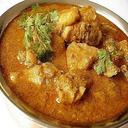

In [ ]:
import random
from pathlib import Path
from PIL import ImageChops

#Set seed
# random.seed(42)
img_path_list = list(train_dir.glob("*/*.JPEG"))

#1. Get random image paths
random_img_path = random.choice(img_path_list)

#2. Get image class from path name
img_class = random_img_path.parent.stem
#3. Open image
img = Image.open(random_img_path)

#4. Print metadata
print(f"Random image path: {random_img_path}")
print(f"Image shape: {img.size}")
print(f"Image heigh:{img.height}")
print(f"Image width: {img.width}")
print(f"The class of the image is: {img_class}")
print(f"Image is of type: {img.mode}")
print(f"Image format: {img.format}")
img

(128, 128, 3)


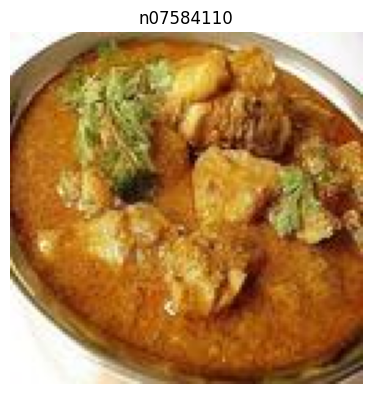

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
print(img_as_array.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)


plt.imshow(img_as_array)
plt.title(img_class)
plt.axis("off")
plt.show()

array([[[253, 242, 246],
        [254, 245, 248],
        [255, 248, 249],
        ...,
        [239, 234, 238],
        [233, 228, 235],
        [228, 223, 230]],

       [[252, 243, 246],
        [253, 244, 247],
        [253, 247, 247],
        ...,
        [240, 235, 239],
        [234, 229, 235],
        [230, 225, 232]],

       [[251, 245, 245],
        [251, 247, 246],
        [250, 249, 247],
        ...,
        [241, 236, 240],
        [237, 232, 238],
        [233, 228, 234]],

       ...,

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [163, 135, 114],
        [140, 112,  91],
        [136, 108,  87]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [149, 119,  93],
        [153, 123,  97],
        [148, 118,  92]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [142, 113,  83],
        [142, 111,  82],
        [141, 110,  81]]], dtype=uint8)
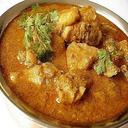

In [ ]:
img_as_array

## 3. Transforming data

In [ ]:
#Write a transform for image
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(100),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((100,100)),
    transforms.ToTensor()
])
data_transform(img).shape

torch.Size([3, 100, 100])

Transformed image shape: torch.Size([100, 100, 3])
Transformed image shape: torch.Size([100, 100, 3])
Transformed image shape: torch.Size([100, 100, 3])
Transformed image shape: torch.Size([100, 100, 3])
Transformed image shape: torch.Size([100, 100, 3])


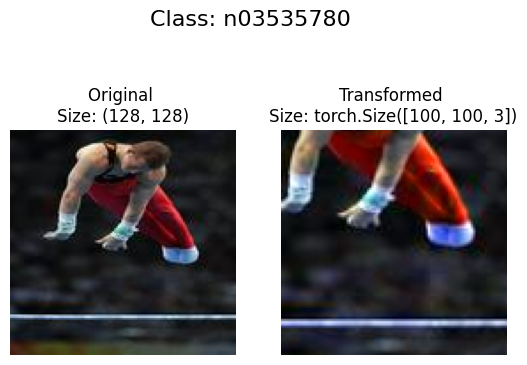

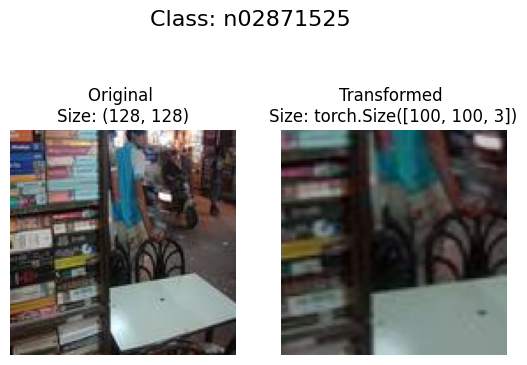

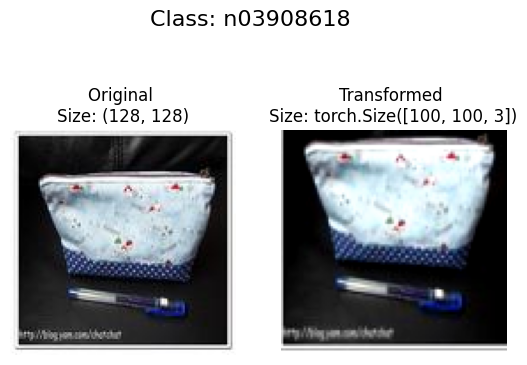

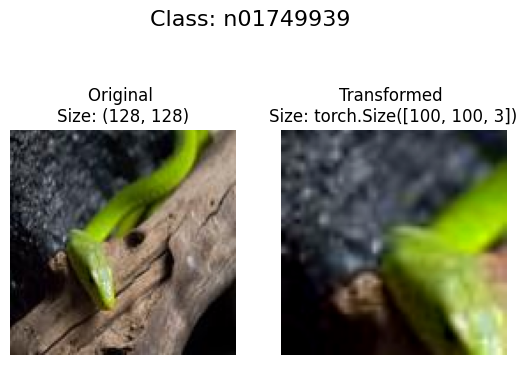

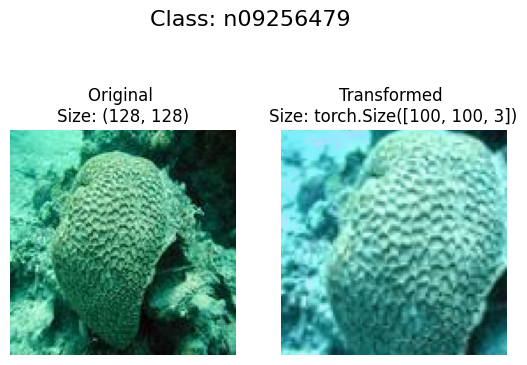

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Selects random images from `image_paths` and loads/transforms them
    then plots and displays them side by side with the original images.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)  # randomly sample the image paths
    for image_path in random_image_paths:
      with Image.open(image_path) as f:
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \nSize: {f.size}")
        ax[0].axis("off")

        #Transform and plot image
        transformed_image = transform(f).permute(1,2,0) #we need to change shape rearrangment for matplot lib
        print(f"Transformed image shape: {transformed_image.shape}")
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(img_path_list, transform=data_transform, n=5, seed=42)

###3.1 Loading image data using ImageFolder `torchvision.datasets.ImageFolder`

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /content/datasets/datasets_resized/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(100, 100), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 10000
    Root location: /content/datasets/datasets_resized/test
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(100, 100), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturat

In [ ]:
#total images in the training and test directories
len(train_data), len(test_data)

(50000, 10000)

## 4. Custom Datasets for Pairs
Since we are we using the `datasets.ImageFolder` from `torchvision` the data loader will returns `(images,labels)` which will not work for Siamese Network as discuss by this [article](https://builtin.com/machine-learning/siamese-network). But for Siamese Network we need a pairs of images and therefore we need a custom datasets that provides pairs of images and corresponding labels indicating whether the images belong to the same class or different classes.

In [ ]:
class SiameseDataset(Dataset):
  def __init__(self, imageFolderDataset, transform=None):
    self.image_folder_dataset = imageFolderDataset
    self.transform = transform

  def __getitem__(self, index):
     #Randomly select an anchor image
      image0_tuple = random.choice(self.image_folder_dataset .imgs)


      #We need to select a random image that is either in the same class or in a different one
      get_random_image_from_class = random.randint(0,1)
      if get_random_image_from_class:
        #Get another image from the same class
        while True:
          image1_tuple = random.choice(self.image_folder_dataset.imgs)
          if image0_tuple[1] == image1_tuple[1]:
            break
      else:
        #Get an image from a different class
        while True:
          image1_tuple = random.choice(self.image_folder_dataset.imgs)
          if image0_tuple[1] != image1_tuple[1]:
            break

      #Load images and convert them to RGB for consistency
      image0 = Image.open(image0_tuple[0]).convert("RGB")
      image1 = Image.open(image1_tuple[0]).convert("RGB")

      #Apply transformations if provided
      if self.transform:
        image0 = self.transform(image0)
        image1 = self.transform(image1)

      #Create a label
      label = torch.tensor(int(image0_tuple[1]== image1_tuple[1]), dtype=torch.float32)


      return image0, image1, label


  def __len__(self):
      return len(self.image_folder_dataset.imgs)


In [ ]:
train_dataset = SiameseDataset(imageFolderDataset=train_data, transform=data_transform)
test_dataset = SiameseDataset(imageFolderDataset=test_data, transform=data_transform)

train_dataset[0][0].shape, train_dataset[0][1].shape

(torch.Size([3, 100, 100]), torch.Size([3, 100, 100]))

## 4.1Turn loaded images into `DataLoader`

In [ ]:
BATCH_SIZE =32

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

len(train_dataloader), len(test_dataloader)


(1563, 313)

## 5. Creating a base model

Adopting [this code](https://github.com/harveyslash/Facial-Similarity-with-Siamese-Networks-in-Pytorch/blob/master/Siamese-networks-medium.ipynb) from github with modifications

In [ ]:
#Create the Siamese Neural Network
class SiameseNetworkV0(nn.Module):
  def __init__(self):
    super(SiameseNetworkV0, self).__init__()

    #Setting up the Sequential of CNN Layers
    self.cnn1 = nn.Sequential(
       nn.Conv2d(3, 96, kernel_size=11,stride=1),
       nn.ReLU(inplace=True),
       nn.MaxPool2d(3, stride=2),

       nn.Conv2d(96, 256, kernel_size=5,stride=1),
       nn.ReLU(inplace=True),
       nn.MaxPool2d(2, stride=2),

       nn.Conv2d(256, 384, kernel_size=3,stride=1),
       nn.ReLU(inplace=True)
    )

    #Calculate flattened size for CNN output
    with torch.no_grad():
      d_input = torch.zeros(1,3,100,100) #dummy input
      self.flattened_size = self._get_flattened_size(d_input)

  def _get_flattened_size(self,x):
    #Pass through cnn layers to determine flattened output size
    x = self.cnn1(x)
    x = x.view(x.size()[0], -1)
    return x.size(1)


  def forward_once(self, x):

    #Pass through CNN layers and flatten output
      output = self.cnn1(x)
      output = output.view(output.size(0), -1)
      # output = self.fc1(output)
      return output

  def forward(self, input1, input2):
      #Pass in both images and obtain flattened embeddings
      output1 = self.forward_once(input1)
      output2 = self.forward_once(input2)

      return output1, output2

## 6 Creating a model with Batch Normalization
As discuss by this [paper](https://arxiv.org/abs/1502.03167). Batch normalization aid in  training stability, convergence, and model performance. This [article ](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/) defines batch normalization as a process that makes neural networks faster and more statble by adding extra layers to a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer. The paper also outlines the Benefits of Batch Normalization
* Speed up learning : Reducing internal covariate shift helps the model train faster.
* Regularizes the model: It adds a little noise to your model, and in some cases, you might not even need to use dropout or other regularization techniques.
* Allows higher learning rates: Gradient descent usually requires small learning rates for the network to converge. Batch normalization helps us use much larger learning rates, speeding up the training process.

In [ ]:
#Create the Siamese Neural Network
class SiameseNetworkV1(nn.Module):
  def __init__(self):
    super(SiameseNetworkV1, self).__init__()

    #Setting up the Sequential of CNN Layers
    self.cnn1 = nn.Sequential(
       nn.Conv2d(3, 96, kernel_size=11,stride=1),
       nn.BatchNorm2d(96),
       nn.ReLU(inplace=True),
       nn.MaxPool2d(3, stride=2),

       nn.Conv2d(96, 256, kernel_size=5,stride=1),
       nn.BatchNorm2d(256),
       nn.ReLU(inplace=True),
       nn.MaxPool2d(2, stride=2),

       nn.Conv2d(256, 384, kernel_size=3,stride=1),
       nn.BatchNorm2d(384),
       nn.ReLU(inplace=True)
    )

    #Calculate flattened size for CNN output
    with torch.no_grad():
      d_input = torch.zeros(1,3,100,100) #dummy input
      self.flattened_size = self._get_flattened_size(d_input)


    #Setting up the Fully Connected Layers
    self.fc1 = nn.Sequential(
       nn.Linear(self.flattened_size,1024),
       nn.ReLU(inplace=True),

       nn.Linear(1024, 256),
       nn.ReLU(inplace=True),

       nn.Linear(256,128)#Reducing dimension to 128 for compact embeddings
    )

  def _get_flattened_size(self,x):
    #Pass through cnn layers to determine flattened output size
    x = self.cnn1(x)
    x = x.view(x.size()[0], -1)
    return x.size(1)


  def forward_once(self, x):

    #Pass through CNN layers and flatten output
      output = self.cnn1(x)
      output = output.view(output.size(0), -1)
      output = self.fc1(output)
      return output

  def forward(self, input1, input2):
      #Pass in both images and obtain flattened embeddings
      output1 = self.forward_once(input1)
      output2 = self.forward_once(input2)

      return output1, output2

## 7. Constrastive Loss

In [ ]:
#Define the Constrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
  def __init__(self, margin=2.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin

  def forward(self, output1, output2, label):
    #Calculate the euclidian distance and calculate the constrative loss
    euclidean_distance = F.pairwise_distance(output1, output2)

    loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                  (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
    return loss_contrastive

### 7.1 Defining a function to save Checkpoints

In [ ]:
def save_checkpoint(state,filename="checkpoint.pth"):
  torch.save(state,filename)

## 8. Training Loop

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Defining the training function with early stopping and a learning rate scheduler
def train(model, criterion, optimizer, train_dataloader, num_epochs, device, save_interval=5, patience=5):
    model.to(device)
    criterion.to(device)
    loss_history = []
    iteration_number = 0

    # Initialize learning rate scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    # Early stopping variables
    best_loss = float("inf")
    no_improvement_epochs = 0

    # Training loop
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        model.train()  # Set the model to training mode
        epoch_loss = 0

        for i, (img0, img1, label) in enumerate(train_dataloader):
            # Move data to the specified device
            img0, img1, label = img0.to(device), img1.to(device), label.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            output1, output2 = model(img0, img1)
            loss = criterion(output1, output2, label)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Accumulate loss for epoch-level average
            epoch_loss += loss.item()
            loss_history.append(loss.item())

            # Print every 10 batches
            if i % 10 == 0:
                print(f"Epoch: {epoch+1} | Batch: {i} | Loss: {loss.item()}")
                iteration_number += 10

        # Calculate average loss for the epoch
        epoch_loss /= len(train_dataloader)
        print(f"Epoch {epoch+1} Average Loss: {epoch_loss}")

        # Step the scheduler based on epoch loss
        scheduler.step(epoch_loss)

        if(optimizer.param_groups[0]['lr'] != scheduler.get_last_lr()[0]): # Detects if LR has changed
          print(f"Learning rate changed to {optimizer.param_groups[0]['lr']}")

        # Early stopping check
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            no_improvement_epochs = 0
            # Optionally save the best model
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"New best model saved with loss {best_loss}")
        else:
            no_improvement_epochs += 1
            if no_improvement_epochs >= patience:
                print("Early stopping triggered")
                break

        # Save checkpoint every `save_interval` epochs
        if (epoch + 1) % save_interval == 0:
            checkpoint_filename = f"checkpoint_epoch_{epoch+1}.pth"
            save_checkpoint({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_loss
            }, filename=checkpoint_filename)
            print(f"Checkpoint saved at {checkpoint_filename}")

    print("Training Complete")
    return loss_history


## 9. Creating Instances of the Model V0 and training

In [ ]:
model = SiameseNetworkV0() #Based on the base model
criterion = ContrastiveLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0005 )

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#call the training function
loss_history = train(model, criterion, optimizer, train_dataloader, num_epochs, device)

### 10. Creating Instances of the Model V1 and training


In [ ]:
model_batch_normalization = SiameseNetworkV1() #Based on the model with batch normalization
criterion = ContrastiveLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0005 )

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#call the training function
loss_history = train(model_batch_normalization, criterion, optimizer, train_dataloader, num_epochs, device)

Epoch 1/10
Epoch: 0 | Batch: 0 | Loss: 1.1703104972839355
Epoch: 0 | Batch: 10 | Loss: 1.1154422760009766
Epoch: 0 | Batch: 20 | Loss: 1.1829339265823364
Epoch: 0 | Batch: 30 | Loss: 1.390681505203247
Epoch: 0 | Batch: 40 | Loss: 1.1780028343200684
Epoch: 0 | Batch: 50 | Loss: 1.2275276184082031
Epoch: 0 | Batch: 60 | Loss: 1.0456044673919678
Epoch: 0 | Batch: 70 | Loss: 0.9299854040145874
Epoch: 0 | Batch: 80 | Loss: 1.07242751121521
Epoch: 0 | Batch: 90 | Loss: 1.185752272605896
Epoch: 0 | Batch: 100 | Loss: 1.1355749368667603
Epoch: 0 | Batch: 110 | Loss: 0.9886479377746582
Epoch: 0 | Batch: 120 | Loss: 1.2252267599105835
Epoch: 0 | Batch: 130 | Loss: 1.1318620443344116
Epoch: 0 | Batch: 140 | Loss: 1.0031204223632812
Epoch: 0 | Batch: 150 | Loss: 1.0590195655822754
Epoch: 0 | Batch: 160 | Loss: 1.2041015625
Epoch: 0 | Batch: 170 | Loss: 0.9775693416595459
Epoch: 0 | Batch: 180 | Loss: 1.1658666133880615
Epoch: 0 | Batch: 190 | Loss: 1.2755508422851562
Epoch: 0 | Batch: 200 | Loss: 

### 11. Creating Instances of the Model V2

In [ ]:
modelV2 = SiameseNetworkV1() #Based on the model with batch normalization
criterion = ContrastiveLoss()
optimizer = optim.Adam(modelV2.parameters(),lr = 0.0005 )

num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#call the training function
loss_history = train(modelV2, criterion, optimizer, train_dataloader, num_epochs, device)

Epoch 1/20
Epoch: 0 | Batch: 0 | Loss: 1.0157575607299805
Epoch: 0 | Batch: 10 | Loss: 20.571548461914062
Epoch: 0 | Batch: 20 | Loss: 6.782503128051758
Epoch: 0 | Batch: 30 | Loss: 0.79310142993927
Epoch: 0 | Batch: 40 | Loss: 0.9885464310646057
Epoch: 0 | Batch: 50 | Loss: 2.548858165740967
Epoch: 0 | Batch: 60 | Loss: 0.9375323057174683
Epoch: 0 | Batch: 70 | Loss: 1.8745405673980713
Epoch: 0 | Batch: 80 | Loss: 1.5866639614105225
Epoch: 0 | Batch: 90 | Loss: 1.1853669881820679
Epoch: 0 | Batch: 100 | Loss: 1.9952728748321533
Epoch: 0 | Batch: 110 | Loss: 1.149094820022583
Epoch: 0 | Batch: 120 | Loss: 1.9671721458435059
Epoch: 0 | Batch: 130 | Loss: 1.444017767906189
Epoch: 0 | Batch: 140 | Loss: 1.61380934715271
Epoch: 0 | Batch: 150 | Loss: 1.0087287425994873
Epoch: 0 | Batch: 160 | Loss: 1.438629150390625
Epoch: 0 | Batch: 170 | Loss: 1.3691173791885376
Epoch: 0 | Batch: 180 | Loss: 1.888734221458435
Epoch: 0 | Batch: 190 | Loss: 1.406990647315979
Epoch: 0 | Batch: 200 | Loss: 1

### 12. Model 3 training

In [ ]:
modelV3 = SiameseNetworkV1() #Based on the model with batch normalization
criterion = ContrastiveLoss()
optimizer = optim.Adam(modelV2.parameters(),lr = 0.0005 )

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#call the training function
loss_history =train(modelV3, criterion, optimizer, train_dataloader, num_epochs, device, save_interval=5, patience=5)

Epoch 1/10
Epoch: 1 | Batch: 0 | Loss: 1.3220158815383911
Epoch: 1 | Batch: 10 | Loss: 1.102189540863037
Epoch: 1 | Batch: 20 | Loss: 1.097200632095337
Epoch: 1 | Batch: 30 | Loss: 1.1827285289764404
Epoch: 1 | Batch: 40 | Loss: 1.050585150718689
Epoch: 1 | Batch: 50 | Loss: 1.133495569229126
Epoch: 1 | Batch: 60 | Loss: 1.0068365335464478
Epoch: 1 | Batch: 70 | Loss: 1.3216959238052368
Epoch: 1 | Batch: 80 | Loss: 0.9283077716827393
Epoch: 1 | Batch: 90 | Loss: 0.9495548009872437
Epoch: 1 | Batch: 100 | Loss: 1.2634590864181519
Epoch: 1 | Batch: 110 | Loss: 1.098456859588623
Epoch: 1 | Batch: 120 | Loss: 0.9548807740211487
Epoch: 1 | Batch: 130 | Loss: 1.1906037330627441
Epoch: 1 | Batch: 140 | Loss: 1.1758997440338135
Epoch: 1 | Batch: 150 | Loss: 1.2287333011627197
Epoch: 1 | Batch: 160 | Loss: 1.0394809246063232
Epoch: 1 | Batch: 170 | Loss: 1.2110254764556885
Epoch: 1 | Batch: 180 | Loss: 1.137235164642334
Epoch: 1 | Batch: 190 | Loss: 1.2915853261947632
Epoch: 1 | Batch: 200 | Lo

### Train from checkpoint (Don't run this)

In [ ]:
def load_checkpoint(checkpoint_file, model, optimizer):
    checkpoint = torch.load(checkpoint_file)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss

In [ ]:
# Initialize model and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SiameseNetworkV0().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)

# Load checkpoint if available
checkpoint_file = "checkpoint_epoch_20.pth"  # Replace with the path of your saved checkpoint
start_epoch = 0
if os.path.exists(checkpoint_file):
    start_epoch, loss = load_checkpoint(checkpoint_file, net, optimizer)
    print(f"Resuming training from epoch {start_epoch} with loss {loss}")

### Evaluation

In [ ]:
import random
import torch
import numpy as np
from sklearn.metrics import average_precision_score
from torch.utils.data import DataLoader, Subset

# Function to sample query and support sets
def sample_query_and_support(test_dataset, num_classes=5, shots=1):
    # Sample 20 random query images, each from a different class
    class_indices = {}
    for idx, (_, label) in enumerate(test_dataset):
        if label not in class_indices:
            class_indices[label] = []
        class_indices[label].append(idx)

    query_indices = []
    support_indices = []

    # Sample 20 query images from different classes
    sampled_classes = random.sample(list(class_indices.keys()), 20)
    for cls in sampled_classes:
        query_indices.append(random.choice(class_indices[cls]))

    # Sample support set for each query
    for cls in sampled_classes:
        other_classes = random.sample(list(class_indices.keys()), num_classes - 1)
        support_classes = [cls] + other_classes  # Ensure true class is in support set

        support_cls_indices = []
        for support_cls in support_classes:
            support_cls_indices.extend(random.sample(class_indices[support_cls], shots))

        support_indices.append(support_cls_indices)

    return query_indices, support_indices

# Function to calculate similarity scores between query and support set
def calculate_similarity(query_embedding, support_embeddings):
    # Use cosine similarity
    query_norm = query_embedding / torch.norm(query_embedding, dim=-1, keepdim=True)
    support_norms = support_embeddings / torch.norm(support_embeddings, dim=-1, keepdim=True)
    similarity_scores = torch.mm(query_norm, support_norms.T)
    return similarity_scores

# Function to calculate AP for a query image
def calculate_ap(similarity_scores, support_labels):
    # Convert similarity scores to numpy for use with sklearn
    scores_np = similarity_scores.detach().cpu().numpy()
    labels_np = support_labels.cpu().numpy()

    # Calculate AP score (binary relevance)
    ap = average_precision_score(labels_np, scores_np)
    return ap

# Evaluation
def evaluate_siamese(net, test_dataset, shots_list=[1, 4, 8, 16], num_classes=5):
    net.eval()  # Set network to evaluation mode
    mAPs = []

    with torch.no_grad():
        for shots in shots_list:
            aps = []

            # Sample query and support sets
            query_indices, support_indices = sample_query_and_support(test_dataset, num_classes=num_classes, shots=shots)

            for query_idx, support_idxs in zip(query_indices, support_indices):
                # Load the query image and support set images
                query_img, query_label = test_dataset[query_idx]
                support_imgs = [test_dataset[idx][0] for idx in support_idxs]
                support_labels = [test_dataset[idx][1] for idx in support_idxs]

                # Prepare images for model input
                query_img = query_img.unsqueeze(0).to(device)  # Add batch dimension and move to device
                support_imgs = torch.stack(support_imgs).to(device)  # Stack support set images and move to device

                # Get embeddings for query and support images
                query_embedding, _ = net(query_img, query_img)  # Siamese forward pass
                support_embeddings, _ = net(support_imgs, support_imgs)

                # Calculate similarity scores
                similarity_scores = calculate_similarity(query_embedding, support_embeddings)

                # Prepare labels for AP calculation
                support_labels_tensor = torch.tensor([1 if label == query_label else 0 for label in support_labels], dtype=torch.float32)

                # Calculate AP for this query
                ap = calculate_ap(similarity_scores.squeeze(), support_labels_tensor)
                aps.append(ap)

            # Calculate mean Average Precision for this scenario
            mean_ap = np.mean(aps)
            print(f"5-way {shots}-shot mean Average Precision: {mean_ap:.4f}")
            mAPs.append(mean_ap)

    return mAPs



# Evaluate the mode
mAPs = evaluate_siamese(modelV2, test_data, shots_list=[1, 4, 8, 16])


5-way 1-shot mean Average Precision: 0.4954
5-way 4-shot mean Average Precision: 0.2932
5-way 8-shot mean Average Precision: 0.2579
5-way 16-shot mean Average Precision: 0.2678


In [ ]:
#Evaluating the model with batch normalization
mAPs = evaluate_siamese(model_batch_normalization, test_data, shots_list=[1, 4, 8, 16])

In [ ]:
#Loading the best model and evaluating it
best_model = SiameseNetworkV1()
best_model.load_state_dict(torch.load('best_model.pth',map_location=device))
best_model.to(device)
mAPs = evaluate_siamese(best_model, test_data, shots_list=[1, 4, 8, 16],num_classes=5)

In [ ]:
mAPs = evaluate_siamese(modelV3, test_data, shots_list=[1, 4, 8, 16],num_classes=5)

5-way 1-shot mean Average Precision: 0.4383
5-way 4-shot mean Average Precision: 0.3192
5-way 8-shot mean Average Precision: 0.2987
5-way 16-shot mean Average Precision: 0.2694


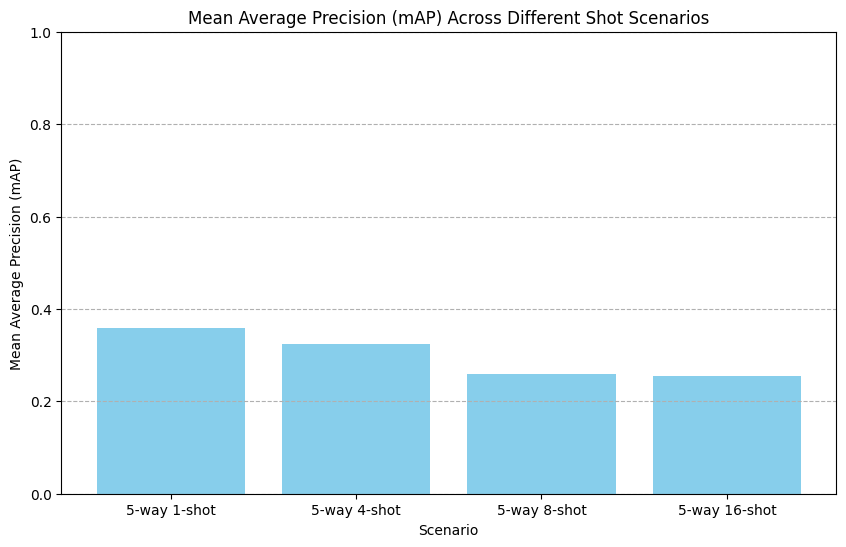

In [ ]:
import matplotlib.pyplot as plt

# Assume mAPs contains mean Average Precision scores for each shot scenario
shots_list = [1, 4, 8, 16]

# Plotting mAPs for different shot scenarios
plt.figure(figsize=(10, 6))
plt.bar([f'5-way {shots}-shot' for shots in shots_list], mAPs, color='skyblue')
plt.xlabel('Scenario')
plt.ylabel('Mean Average Precision (mAP)')
plt.title('Mean Average Precision (mAP) Across Different Shot Scenarios')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

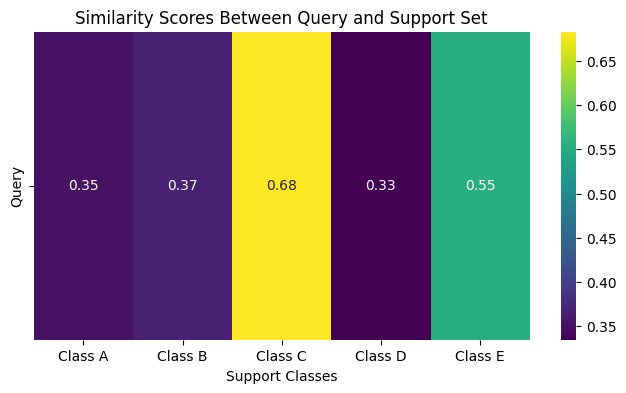

In [ ]:
import seaborn as sns
import numpy as np

# Assume similarity_scores is a list of similarity scores for a query and support set
# Example similarity scores for a single query image
similarity_scores = torch.rand(5).detach().cpu().numpy()  # Random similarity scores for illustration
support_classes = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']

# Plotting similarity scores as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap([similarity_scores], annot=True, cmap='viridis', cbar=True, xticklabels=support_classes, yticklabels=['Query'])
plt.xlabel('Support Classes')
plt.title('Similarity Scores Between Query and Support Set')
plt.show()


In [ ]:

import matplotlib.pyplot as plt

def visualize_query_and_support(query_img, support_imgs, support_labels, test=None):
    # Determine the number of rows and columns for the grid layout
    num_support = len(support_imgs)
    num_cols = 3  # Number of columns (you can adjust this)
    num_rows = (num_support + 1) // num_cols + 1  # +1 for the query image

    # Set the figure size for better clarity
    plt.figure(figsize=(15, num_rows * 5))

    # Plot the query image in the first position
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(query_img.permute(1, 2, 0))  # Assuming query_img is a Tensor of shape [C, H, W]
    plt.title('Query Image', fontsize=16, fontweight='bold')
    plt.axis('off')

    # Plot support images
    for i, (support_img, label) in enumerate(zip(support_imgs, support_labels), start=2):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(support_img.permute(1, 2, 0))  # Assuming support_img is a Tensor of shape [C, H, W]
        plt.title(f'Support Class: {label}', fontsize=14)
        plt.axis('off')

    # Add padding between subplots
    plt.tight_layout(pad=3.0)
    plt.show()





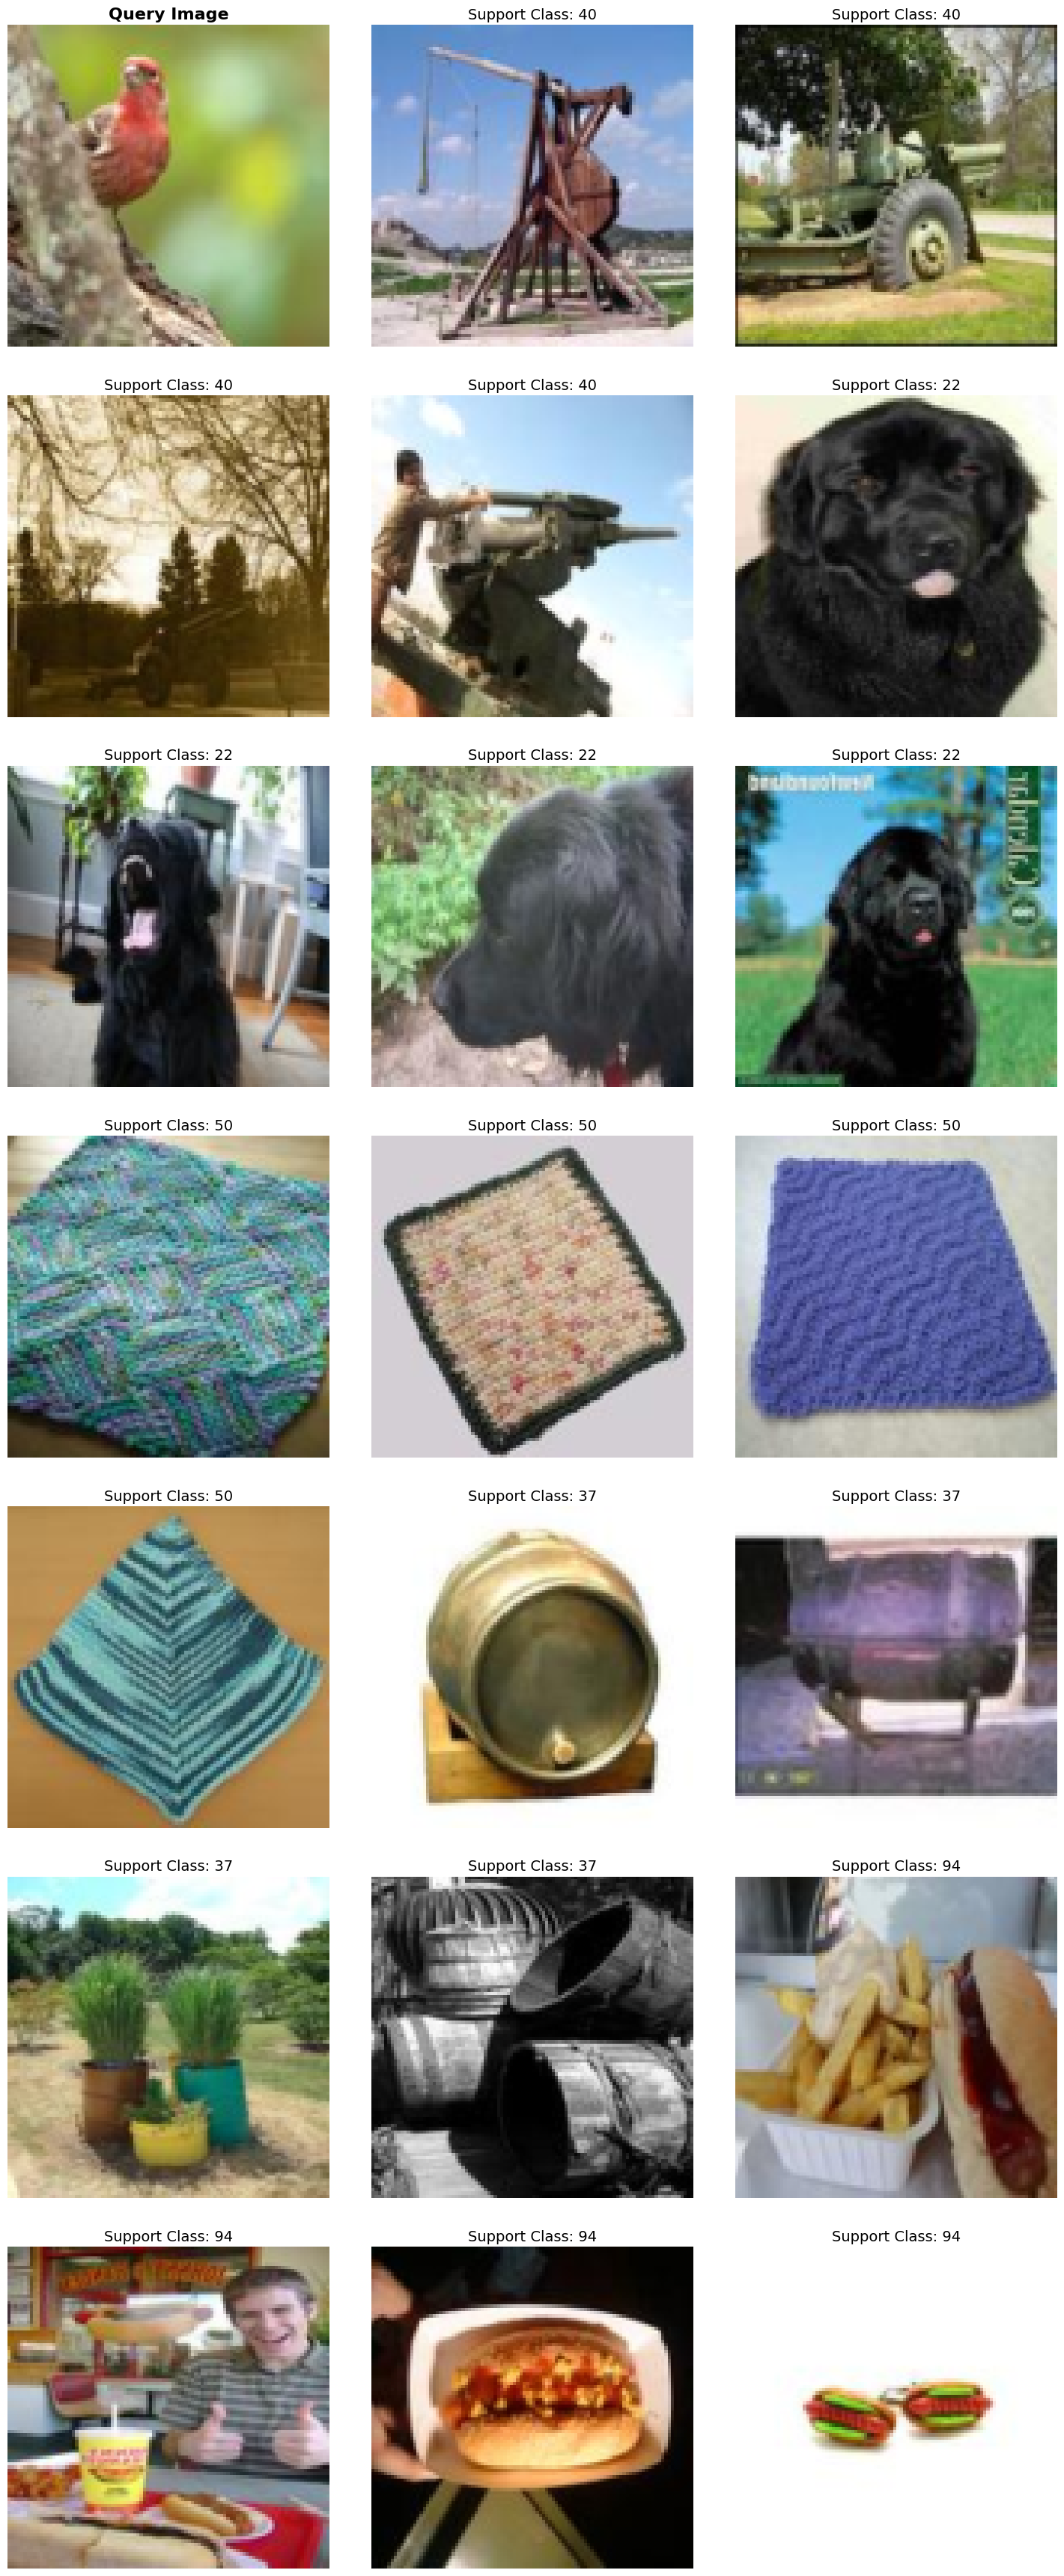

In [ ]:
import random

# Randomly select a query image (for example, index 0)
query_img = test_data[0][0]

# Randomly select support set (5-way support set with 4 shots each)
num_classes = 5
shots = 4
class_indices = {}

# Organize indices by class
for idx, (_, label) in enumerate(test_data):
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)

# Randomly choose 5 classes
selected_classes = random.sample(list(class_indices.keys()), num_classes)
support_imgs = []
support_labels = []

# Select 'shots' number of images for each selected class
for cls in selected_classes:
    selected_indices = random.sample(class_indices[cls], shots)
    for idx in selected_indices:
        support_imgs.append(test_data[idx][0])
        support_labels.append(cls)

# Visualize the query and sampled support set
visualize_query_and_support(query_img, support_imgs, support_labels)


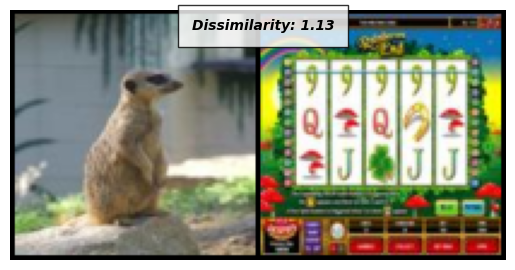

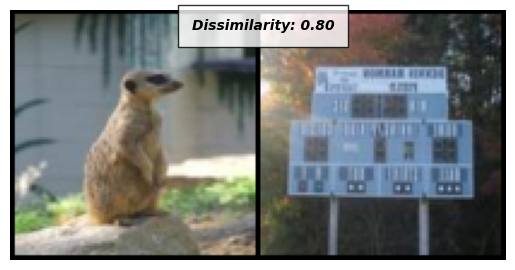

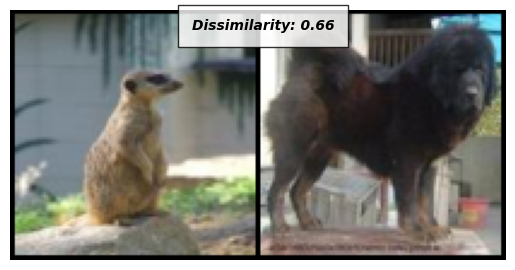

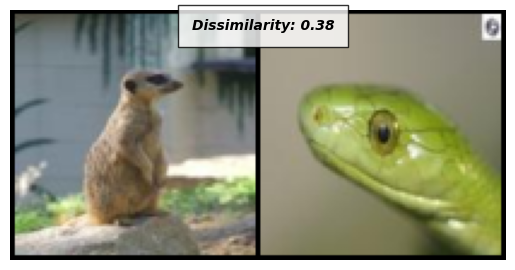

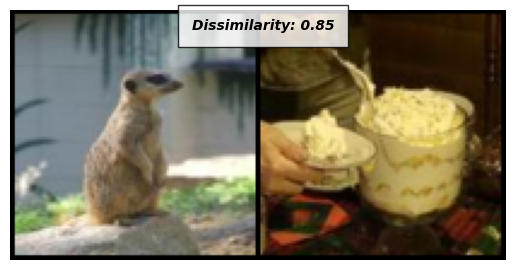

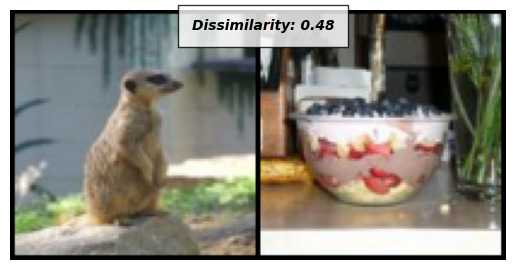

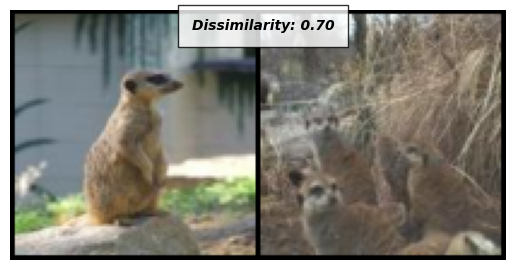

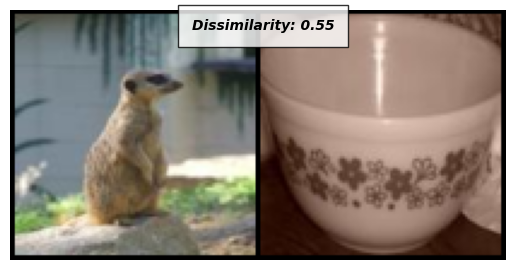

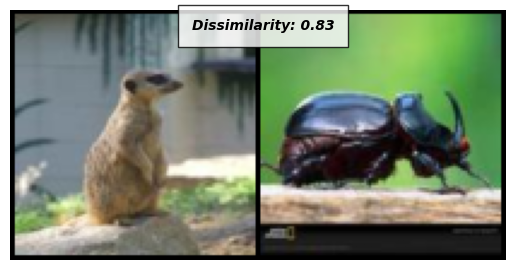

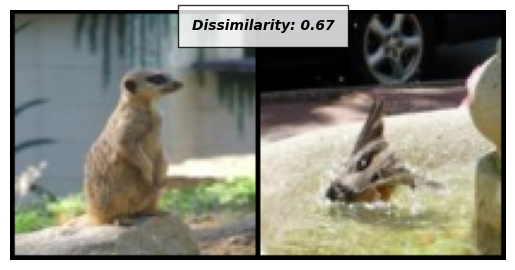

In [ ]:
# Creating some helper functions
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Grab one image and label from the test dataloader
dataiter = iter(test_dataloader)
x0_batch,_, label0_batch = next(dataiter)
x0 = x0_batch[0].unsqueeze(0)  # Get the first image in the batch and keep the batch dimension
label0 = label0_batch[0]  # Get the corresponding label

# Initialize a counter for comparisons
comparison_count = 0
max_comparisons = 10

# Iterate through the dataloader to find images from the same class as x0
for x1_batch,_, label1_batch in test_dataloader:
    for i in range(len(label1_batch)):
        # Only select images from the same class as x0
        if label1_batch[i] == label0:
            x1 = x1_batch[i].unsqueeze(0)  # Get the image and keep the batch dimension

            # Concatenate the two images together for visualization
            concatenated = torch.cat((x0, x1), 0)

            # Calculate the dissimilarity using the Siamese network
            output1, output2 = net(Variable(x0).to(device), Variable(x1).to(device))
            euclidean_distance = F.pairwise_distance(output1, output2)
            avg_distance = euclidean_distance.mean().item()

            # Display the concatenated images with dissimilarity score
            imshow(torchvision.utils.make_grid(concatenated), 'Dissimilarity: {:.2f}'.format(avg_distance))

            # Update the comparison count
            comparison_count += 1
            if comparison_count >= max_comparisons:
                break
    if comparison_count >= max_comparisons:
        break
